### Question 4

#### Import relevant packages

In [2]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

/Users/fan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


#### (a) Load the dataset `citrus_leaves` from `tensorflow_datasets`. Split the dataset into 60% for training and 40% for testing [**2 points**]

In [ ]:
pip install tensorflow-datasets

In [3]:
import tensorflow_datasets as tfds

#load dataset
ds = tfds.load('citrus_leaves', split='train', shuffle_files=True)


/Users/fan/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
## write your code here to split data into 60% train 40% test

#60% train dataset size
train_size = int(0.6 * len(ds))

#extract from dataset 
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size) #take the data that dont belong to train_ds

train_images = []
train_labels = []
test_images = []
test_labels = []

#iterate through train_ds to put into train_images and train_labels
for i in train_ds:
    image = tf.cast(i["image"], tf.float32) / 255.0
    label = i["label"]
    train_images.append(image)
    train_labels.append(label)
    
#iterate through test_ds to put into test_images and test_labels
for i in test_ds:
    image = tf.cast(i["image"], tf.float32) / 255.0
    label = i["label"]
    test_images.append(image)
    test_labels.append(label)
    
train_images = tf.stack(train_images)
train_labels = tf.stack(train_labels)
test_images = tf.stack(test_images)
test_labels = tf.stack(test_labels)

# print(train_images.shape)
# print(test_images.shape)

2024-02-17 12:43:47.993552: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


#### (b) Build a dense ANN with at least one hidden layer with at least two nodes. You should try different hyper parameter configurations to get the best performing ANN. [**2 points**]

In [201]:

## write your code here to build your dense ANN
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(256, 256, 3)))
model.add(layers.Dense(70, activation=tf.nn.relu)) 
model.add(layers.Dense(56, activation=tf.nn.relu)) 

# model.add(layers.Dense(360, activation=tf.nn.relu))

model.add(layers.Dense(4, activation=tf.nn.softmax))

model.summary()


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 196608)            0         
                                                                 
 dense_93 (Dense)            (None, 70)                13762630  
                                                                 
 dense_94 (Dense)            (None, 56)                3976      
                                                                 
 dense_95 (Dense)            (None, 4)                 228       
                                                                 
Total params: 13766834 (52.52 MB)
Trainable params: 13766834 (52.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [136]:
info = tfds.builder('citrus_leaves').info
output_layer_size = info.features['label'].num_classes
model.add(tf.keras.layers.Dense(output_layer_size, activation='softmax'))

print(output_layer_size)

4


#### (c) Answer the following questions: [**1 point**]

What is the size of your output layer? [4]

What is the activation function of your output layer? [softmax]

#### (d) Compile and train your model [**2 points**]

What is the loss function you use? [sparse_categorical_crossentropy]

In [206]:
### write your code here to compile model
# Compile the model with appropriate Loss function. metrics is something you can monitor (but model does not optimize metrc) ->gradient descent
model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [207]:
### write your code here to train your model

# Run the stochastic gradient descent for specified epochs
epochs = 50
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=32)


Epoch 1/50
12/12 [==============================] - 1s 25ms/step - loss: 7.8308 - accuracy: 0.4017
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 2.5936 - accuracy: 0.4888
Epoch 3/50
12/12 [==============================] - 0s 18ms/step - loss: 1.5546 - accuracy: 0.5506
Epoch 4/50
12/12 [==============================] - 0s 17ms/step - loss: 0.7902 - accuracy: 0.6994
Epoch 5/50
12/12 [==============================] - 0s 17ms/step - loss: 0.6360 - accuracy: 0.7360
Epoch 6/50
12/12 [==============================] - 0s 20ms/step - loss: 0.4614 - accuracy: 0.8090
Epoch 7/50
12/12 [==============================] - 0s 19ms/step - loss: 0.6647 - accuracy: 0.7556
Epoch 8/50
12/12 [==============================] - 0s 17ms/step - loss: 0.8696 - accuracy: 0.7079
Epoch 9/50
12/12 [==============================] - 0s 17ms/step - loss: 0.7247 - accuracy: 0.7191
Epoch 10/50
12/12 [==============================] - 0s 17ms/step - loss: 0.6235 - accuracy: 0.7472
Epoch 11/

#### (e) Plot the training loss across the different epochs [**1 point**]

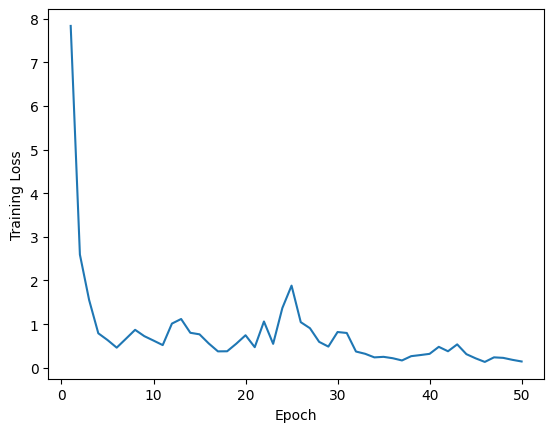

In [209]:
### write your code here to plot loss
import matplotlib.pyplot as plt

plt.plot(range(1, 51), history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

#### (f) What is the overall accuracy and per-class accuracy on test dataset? [**2 points**]

In [208]:
#### write your code to report overall accuracy on test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Overall accuracy: ", test_accuracy)

8/8 [==============================] - 0s 5ms/step - loss: 0.8487 - accuracy: 0.7059
Overall accuracy:  0.7058823704719543


What is the overall accuracy? [0.7059]

In [210]:
### write your code to report per-class accuracy
### you should have a list where index is the class label with value corresponding to accuracy for that class label
import numpy as np

#get predictions for test data based on trained data
predictions = model.predict(test_images)
predictions.shape

#create list
class_accuracyList = {}

#num of classes
class_num = info.features["label"].num_classes

#class names
class_names = info.features["label"].names

#iterate through the classes and take down correct predictions
for i in range(class_num):
  class_predictions = predictions[test_labels == i]
  class_true_label = test_labels[test_labels == i]
  
  predicted = np.argmax(class_predictions, axis=1)
  correct_predictions = (predicted == class_true_label)
  class_accuracy = np.mean(correct_predictions)
    
  class_accuracyList[class_names[i]] = class_accuracy

#print accuracy
for class_name, accuracy in class_accuracyList.items():
    print(f"Accuracy for class {class_name}: {accuracy}")


8/8 [==============================] - 0s 6ms/step
Accuracy for class Black spot: 0.5
Accuracy for class canker: 0.9516129032258065
Accuracy for class greening: 0.6703296703296703
Accuracy for class healthy: 0.7619047619047619
